## 01. 데이터셋 생성하기

In [2]:
pip install mxnet

     |████████████████████████████████| 38.7MB 98kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [9]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [10]:
features[0], labels[0]

(
 [-0.8365324  1.2877399]
 <NDArray 2 @cpu(0)>, 
 [-1.8555021]
 <NDArray 1 @cpu(0)>)

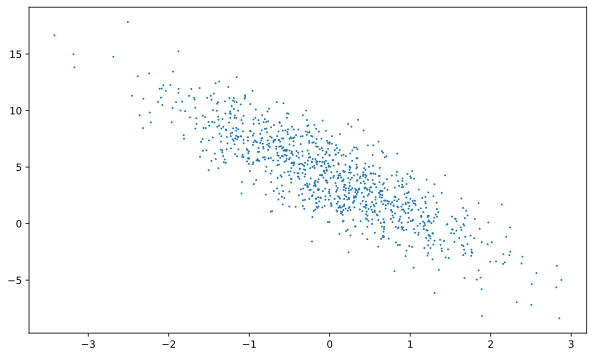

In [13]:
def use_svg_display():
  #Display in vector graphics
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
  use_svg_display()
  # Set the size of the graph to be plotted
  plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

#02. 데이터 읽기

In [16]:
# This function has been saved in the d2l package for future use

def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = nd.array(indices[i: min(i + batch_size, num_examples)])
    yield features.take(j), labels.take(j)
    #The "take" function will then return the corresponding element based on the indices

In [17]:
batch_size = 10

for X , y in data_iter(batch_size, features, labels):
  print(X, y)
  break


[[-0.3623203   1.2819643 ]
 [-0.12879907  2.8155067 ]
 [ 0.5792539  -0.44920528]
 [ 0.12945853  0.24529482]
 [ 1.8739617  -0.5313302 ]
 [ 0.08006118 -0.6636906 ]
 [ 0.57728785 -1.1828389 ]
 [-1.2146055  -1.334926  ]
 [-1.1622226   0.13975932]
 [ 1.2375522   0.48805884]]
<NDArray 10x2 @cpu(0)> 
[-0.8826475 -5.6369047  6.897266   3.6195722  9.756547   6.622696
  9.365571   6.3101735  1.414385   5.0215816]
<NDArray 10 @cpu(0)>


#03. 모델 파라미터들 초기화하기

In [19]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [20]:
w.attach_grad()
b.attach_grad()

#04. 모델 정의하기

In [21]:
#This function has been saved in the d2l package for future use
def linreg(X, w, b):
  return nd.dot(X, w)+b

#05. 손실 함수(loss function) 정의하기

In [23]:
#This function has been saved in the d2l package for future use
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

#06. 최적화 알고리즘 정의하기

In [22]:

def sgd(params, lr, batch_size):
  for param in params:
    param[:] = param - lr * param.grad / batch_size

#07. 학습

In [26]:
lr = 0.03 #learning rate
num_epochs = 3 #Number of iterations
net = linreg # Our fancy linear model
loss = squared_loss # 0.5 (y-y')^2

for epoch in range(num_epochs):
  #Assuming the number of examples can be divided by the batch size, all
  #the examples in the training data set are used in one epoch iteration.
  #The features and tags of mini-batch examples are given by X and y respectively
  for X, y in data_iter(batch_size, features, labels):
    with autograd.record():
      l = loss(net(X, w, b), y)  #Minibatch loss in X and y
    l.backward() #Compute gradient on l with respect to [w,b]
    sgd([w, b], lr, batch_size)   #Update parameters using their gradient
  train_l = loss(net(features, w, b), labels)
  print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))


epoch 1, loss 0.046320
epoch 2, loss 0.000190
epoch 3, loss 0.000051


In [29]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w 
[ 0.00032878 -0.00073719]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00027466]
<NDArray 1 @cpu(0)>
